# Metric

`sklearn.neighbours.NearestNeighbours` has a really important argument - `metric`, it specifies the formula that will be used to compare objects.

You can pass:

- One of the predefined strings, checkout [their list](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics);
- Or callable that takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors, there are many such options in [scipy distance computations](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

In [19]:
import os
import sys

from IPython.display import Image as IPImage

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

from scipy.spatial.distance import correlation

from pathlib import Path
nn_files = Path(os.getcwd()).parent/"nearest_neighbors_files"

if str(nn_files) not in sys.path:
    sys.path.append(str(nn_files))

from visualisations import get_circle_gif

## Example

We will use two-dimensional objects to be able to visualise. The following cell generates and visualises the set of objects we are going to use.

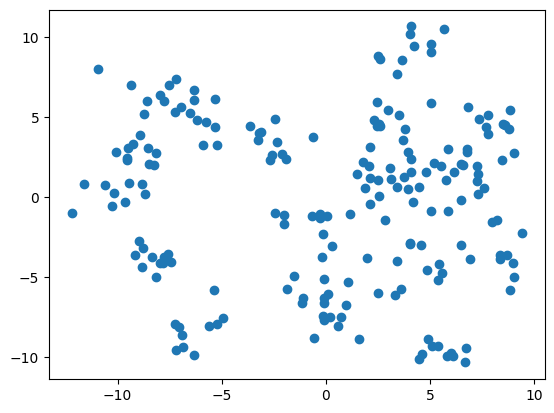

In [14]:
X, _ = make_blobs(
    n_samples=200,
    random_state=10,
    centers=20
)
plt.scatter(X[:,0], X[:,1])
plt.show()

## Estimators

Now let's build two estimators - almost the same, just using a different metric.

In [7]:
default_metric = NearestNeighbors(n_neighbors=20).fit(X)
correlation_metric = NearestNeighbors(
    n_neighbors=20, 
    metric=correlation
).fit(X)

Now let's consider what objects will be considered as nearest when using different metrics for an object that walks in a circle.

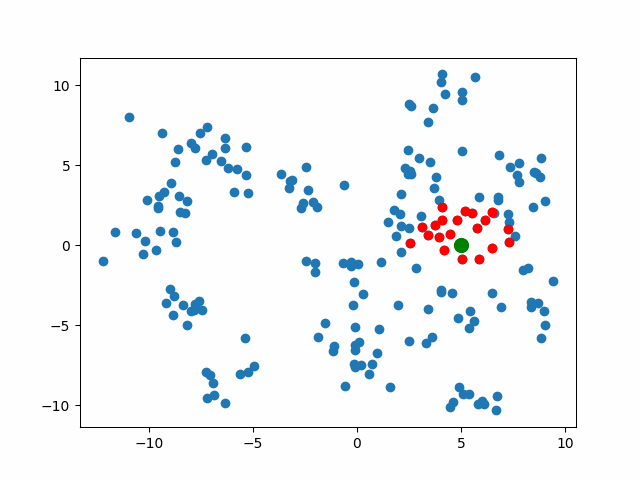

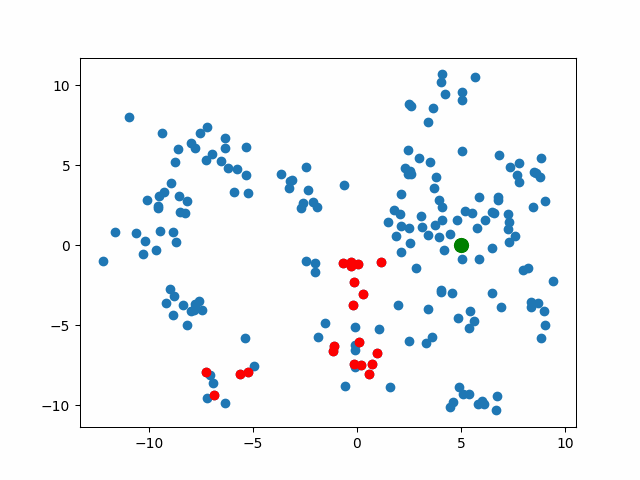

In [29]:
gif_buf = get_circle_gif(default_metric, X)
display(IPImage(data=gif_buf.getvalue()))
gif_buf = get_circle_gif(correlation_metric, X)
display(IPImage(data=gif_buf.getvalue()))